<a href="https://colab.research.google.com/github/rahayunr16/Soed_Team/blob/main/COMPFEST17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Academy COMPFEST 17 (Soed Team)

## Overview Proyek

Proyek ini berfokus pada pengembangan model prediksi konsumsi listrik harian (dalam satuan GWh) menggunakan data historis cuaca dan energi dari berbagai wilayah di Indonesia. Pemahaman dan prediksi pola konsumsi listrik sangat penting untuk efisiensi distribusi energi, pengendalian beban puncak, dan mitigasi risiko pemadaman.

**Latar Belakang:**

Listrik adalah kebutuhan fundamental yang konsumsinya sangat dipengaruhi oleh faktor cuaca seperti suhu, durasi sinar matahari, kecepatan angin, dan kelembapan udara. Fluktuasi ini memengaruhi kebutuhan energi suatu wilayah, sehingga kemampuan untuk memprediksi konsumsi listrik berdasarkan data cuaca menjadi krusial untuk perencanaan energi yang efisien dan berkelanjutan.

**Tujuan Analisis:**

Tujuan utama proyek ini adalah membangun model machine learning yang mampu memprediksi konsumsi listrik harian secara akurat.

**Data:**

Dataset yang akan digunakan berasal dari kaggle berikut : https://www.kaggle.com/competitions/seleksi-dsa-compfest-17/

**Manfaat:**

Proyek ini diharapkan dapat memberikan kontribusi nyata dalam:
- Efisiensi Energi Nasional: Optimalisasi penggunaan dan distribusi energi.
- Pengendalian Beban Puncak: Mengurangi risiko kelebihan beban dan pemadaman.
- Mitigasi Risiko Pemadaman: Perencanaan yang lebih baik untuk mencegah gangguan pasokan listrik.
- Pengelolaan Energi Masa Depan Indonesia: Mendukung keberlanjutan pasokan energi nasional.

## Persiapan

**MENYIAPKAN LIBRARY YANG DIBUTUHKAN**

**Fungsi cell ini:**
- Mengimport semua library yang diperlukan untuk analisis data

In [67]:
! pip install streamlit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as ols
import statsmodels.api as sm
from google.colab import files
import streamlit
import joblib
import io
import pickle
import os

from scipy.stats import chi2_contingency
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import xgboost as xgb
from scipy.stats import skew
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Semua library berhasil diimpor!")

Semua library berhasil diimpor!


**MENYIAPKAN DATA YANG DIGUNAKAN**

**Fungsi cell ini:**
- Membaca file CSV dataset tentang konsumsi listrik harian (submission.csv, train.csv, test.csv).
- Menampilkan informasi dasar tentang dataset
- Melihat dimensi data (jumlah baris dan kolom)
- Menampilkan daftar semua kolom dalam dataset

In [68]:
# Unggah kaggle.json ke Google Colab
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rahayunur","key":"f3b04d2cbea2c3217233eb93b7fe1b8f"}'}

In [69]:
# Pindahkan kaggle.json ke lokasi yang benar dan ubah izin
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [70]:
# Unduh Data
!kaggle competitions download -c seleksi-dsa-compfest-17

seleksi-dsa-compfest-17.zip: Skipping, found more recently modified local copy (use --force to force download)


In [71]:
# Ekstrak File
!unzip seleksi-dsa-compfest-17.zip

Archive:  seleksi-dsa-compfest-17.zip
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission.csv          
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [72]:
# Muat Data dan Eksplorasi Data Awal (EDA)
# Muat dataset train
df_train = pd.read_csv('train.csv')
print("Dataset 'train.csv' berhasil dimuat.")
print("\n--- DATASET TRAIN OVERVIEW ---")
print("=" * 50)
print(f"Shape: {df_train.shape[0]} rows, {df_train.shape[1]} columns")
print(f"Memory usage: {df_train.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("\nColumns:")
for i, col in enumerate(df_train.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n----------------------------------")

# Muat dataset test
df_test = pd.read_csv('test.csv')
print("\nDataset 'test.csv' berhasil dimuat.")
print("\n--- DATASET TEST OVERVIEW ---")
print("=" * 50)
print(f"Shape: {df_test.shape[0]} rows, {df_test.shape[1]} columns")
print(f"Memory usage: {df_test.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("\nColumns:")
for i, col in enumerate(df_test.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n----------------------------------")

Dataset 'train.csv' berhasil dimuat.

--- DATASET TRAIN OVERVIEW ---
Shape: 11688 rows, 15 columns
Memory usage: 3492.83 KB

Columns:
   1. ID
   2. date
   3. cluster_id
   4. electricity_consumption
   5. temperature_2m_max
   6. temperature_2m_min
   7. apparent_temperature_max
   8. apparent_temperature_min
   9. sunshine_duration
  10. daylight_duration
  11. wind_speed_10m_max
  12. wind_gusts_10m_max
  13. wind_direction_10m_dominant
  14. shortwave_radiation_sum
  15. et0_fao_evapotranspiration

----------------------------------

Dataset 'test.csv' berhasil dimuat.

--- DATASET TEST OVERVIEW ---
Shape: 3400 rows, 14 columns
Memory usage: 989.58 KB

Columns:
   1. ID
   2. date
   3. cluster_id
   4. temperature_2m_max
   5. temperature_2m_min
   6. apparent_temperature_max
   7. apparent_temperature_min
   8. sunshine_duration
   9. daylight_duration
  10. wind_speed_10m_max
  11. wind_gusts_10m_max
  12. wind_direction_10m_dominant
  13. shortwave_radiation_sum
  14. et0_fao_

In [73]:
df_train.head()

,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,cluster_1_2014-01-02,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


In [74]:
df_test.head()

,ID,date,cluster_id,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2022-01-01,2022-01-01,cluster_1,15.2,7.9,14.2,5.2,21902.986667,29784.506667,22.2,37.8,172.732245,4.173333,0.780000
1,cluster_2_2022-01-01,2022-01-01,cluster_2,15.9,4.1,15.3,1.3,23550.080000,30647.540000,22.7,38.5,163.972679,5.146667,0.730000
2,cluster_3_2022-01-01,2022-01-01,cluster_3,18.6,4.9,18.8,1.8,24179.643333,31545.103333,15.5,26.3,198.645137,5.713333,0.730000
3,cluster_4_2022-01-01,2022-01-01,cluster_4,13.3,3.9,11.9,1.3,23839.203333,30766.446667,16.1,27.4,183.517316,4.200000,0.486667
4,cluster_1_2022-01-02,2022-01-02,cluster_1,14.1,8.1,11.2,5.3,21018.193333,29847.110000,34.4,59.4,223.335840,4.030000,1.170000


## Data Understanding (Berdasarkan Train.csv)

**Fungsi cell ini:**

- Memahami fitur dataset pada bisnis masalah prediksi konsumsi listrik harian.
- Menganalisis struktur dan tipe data dalam dataset.
- Menganalisis statistika deskriptif pada kolom dataset.
- Mengecek missing values (data yang hilang).
- Mengecek nilai unik.
- Mengecek data duplikat.

**MEMAHAMI LABEL DATA:**

- `ID` : string. Identifikasi unik (format: <cluster_id>_<YYYY-MM-DD>)
- `date` : string. Format: YYYY-MM-DD.
- `cluster_id` : string. Identifikasi cluster (misal cluster_1 hingga cluster_4).
- `electricity_consumption` : float. (Hanya di train.csv) Konsumsi listrik harian dalam GWh.
- `temperature_2m_max` : float. Suhu maksimum di ketinggian 2 meter (°C).
- `temperature_2m_min` : float. Suhu minimum di ketinggian 2 meter (°C).
- `apparent_temperature_max` : float. Suhu terasakan maksimum (°C).
- `apparent_temperature_min` : float. Suhu terasakan minimum (°C).
- `sunshine_duration` : float. Durasi sinar matahari per hari (jam).
- `daylight_duration` : float. Durasi siang hari (detik).
- `wind_speed_10m_max` : float. Kecepatan angin maksimum di 10 meter (m/s).
- `wind_gusts_10m_max` : float. Kecepatan embusan angin maksimum di 10 meter (m/s)
- `wind_direction_10m_dominant` : int. 	Arah angin dominan di 10 meter (derajat dari utara)
- `shortwave_radiation_sum` : float. Total radiasi gelombang pendek (MJ/m²)
- `et0_fao_evapotranspiration` : float. Evapotranspirasi referensi FAO (Penman-Monteith) (mm).

**AKRONIM & SATUAN**

- GWh: Gigawatt-jam — satuan energi (1 GWh = 10⁹ watt-jam)
- GW: Gigawatt — satuan daya (1 GW = 10⁹ watt)
°C: Derajat Celsius
- m/s: Meter per detik
- MJ/m²: Megajoule per meter persegi
- FAO: Food and Agriculture Organization (Organisasi Pangan dan Pertanian PBB)

**STRUKTUR DAN TIPE DATA**

In [75]:
print("\n--- Informasi Detail Data Train ---")
print(df_train.dtypes)


--- Informasi Detail Data Train ---
ID                              object
date                            object
cluster_id                      object
electricity_consumption        float64
temperature_2m_max             float64
temperature_2m_min             float64
apparent_temperature_max       float64
apparent_temperature_min       float64
sunshine_duration              float64
daylight_duration              float64
wind_speed_10m_max             float64
wind_gusts_10m_max             float64
wind_direction_10m_dominant    float64
shortwave_radiation_sum        float64
et0_fao_evapotranspiration     float64
dtype: object


Diperoleh bahwa data df_train memiliki 11.688 baris dan 15 kolom. Dengan rincian kolom ber tipe float64 terdiri dari : `electricity_consumption`,`temperature_2m_max `,`temperature_2m_min`,`apparent_temperature_max`,`apparent_temperature_min`,`sunshine_duration`,`daylight_duration`,`wind_speed_10m_max`,`wind_gusts_10m_max `,`wind_direction_10m_dominant`,`shortwave_radiation_sum`,`et0_fao_evapotranspiration`. Dengan rincian kolom ber tipe object : `ID`,`date`,`cluster_id`.

Terdapat kolom `ID` harus dicek duplikasinya.

Terdapat kolom `date` coba dicek time seriesnya apakah teratur atau tidak dan seharusnya bertipe datetime.

Tidak terdapat kolom `electricity_consumption` pada  test.csv tetapi ada pada train.csv sehingga akan dilakukan pemodelan disini untuk mengisi kolom pada test.csv.

Terdapat kolom `wind_direction_10m_dominant` bernilai float tetapi pada deskripsi menyatakan int, perlu diubah tipenya.

**STATISTIKA DESKRIPTIF**

In [76]:
print("\nStatistik Deskriptif Data Train:")
print(df_train.describe())


Statistik Deskriptif Data Train:
       electricity_consumption  temperature_2m_max  temperature_2m_min  \
count             11688.000000        11688.000000        11688.000000   
mean                642.313328           18.733385            7.174786   
std                 287.673473            7.504161            5.960263   
min                 207.472000           -1.900000          -10.800000   
25%                 414.376000           12.800000            2.500000   
50%                 602.672000           18.200000            7.100000   
75%                 836.034500           24.300000           12.100000   
max                1658.348000           40.900000           23.200000   

       apparent_temperature_max  apparent_temperature_min  sunshine_duration  \
count              11688.000000              11688.000000       11688.000000   
mean                  17.215315                  4.784608       29302.656241   
std                    9.085303                  7.260336  

Terdapat anomali `sunshine_duraction` karena menunjukkan nilai maksimum yang sangat tidak masuk akal (puluhan ribu, jauh melampaui 24 jam sehari). Ini mengindikasikan kemungkinan besar adanya kesalahan satuan (unit error) yaitu dalam detik. Namun, untuk kesesuaian deskripsi ini dapat diubah menjadi satuan jam.

**CEK MISSING VALUE**

In [77]:
print("\nJumlah Nilai Hilang di Data Train:")
print(df_train.isnull().sum())


Jumlah Nilai Hilang di Data Train:
ID                             0
date                           0
cluster_id                     0
electricity_consumption        0
temperature_2m_max             0
temperature_2m_min             0
apparent_temperature_max       0
apparent_temperature_min       0
sunshine_duration              0
daylight_duration              0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64


Tidak terdapat nilai kosong sehingga tidak ada penanganan di pemrosesan data.

**NILAI UNIK**

In [78]:
print("\n--- Nilai Unik per Kolom di Data Train ---")
print("=" * 50)

for col in df_train.columns:
    print(f"\nKolom '{col}':")

    if df_train[col].nunique() < 50:
        print(f"  Jumlah nilai unik: {df_train[col].nunique()}")
        print(f"  Nilai-nilai unik: {df_train[col].unique()}")
    else:
        print(f"  Jumlah nilai unik: {df_train[col].nunique()}")

print("\nIdentifikasi nilai unik selesai.")


--- Nilai Unik per Kolom di Data Train ---

Kolom 'ID':
  Jumlah nilai unik: 11688

Kolom 'date':
  Jumlah nilai unik: 2922

Kolom 'cluster_id':
  Jumlah nilai unik: 4
  Nilai-nilai unik: ['cluster_1' 'cluster_2' 'cluster_3' 'cluster_4']

Kolom 'electricity_consumption':
  Jumlah nilai unik: 11615

Kolom 'temperature_2m_max':
  Jumlah nilai unik: 387

Kolom 'temperature_2m_min':
  Jumlah nilai unik: 317

Kolom 'apparent_temperature_max':
  Jumlah nilai unik: 448

Kolom 'apparent_temperature_min':
  Jumlah nilai unik: 372

Kolom 'sunshine_duration':
  Jumlah nilai unik: 11609

Kolom 'daylight_duration':
  Jumlah nilai unik: 11683

Kolom 'wind_speed_10m_max':
  Jumlah nilai unik: 445

Kolom 'wind_gusts_10m_max':
  Jumlah nilai unik: 264

Kolom 'wind_direction_10m_dominant':
  Jumlah nilai unik: 11556

Kolom 'shortwave_radiation_sum':
  Jumlah nilai unik: 6909

Kolom 'et0_fao_evapotranspiration':
  Jumlah nilai unik: 2633

Identifikasi nilai unik selesai.


Terdapat kolom `ID` yang menyatakan nilai unik atau identitas dari setiap baris. Adapun jumlah barisnya sama dengan jumlah nilai unik. Sehingga kemungkinan besar tidak ada data duplikat.

Untuk kolom `date` jumlah nilai unik hanya sekitar 200an sehingga mungkin terdapat loncat hari atau tiap cluster hanya terhitung 200 hari (tetapi masih kurang lengkap untuk masing-masing 4 cluster).

Untuk kolom `cluster_id` terdapat 4 cluster sehingga bisa eksplorasi untuk masing-masing cluster.

**CEK DATA DUPLIKAT**

In [79]:
df_train.duplicated().sum()

np.int64(0)

Tidak terdapat data yang duplikat, sehingga tidak ada strategi penanganannya.

## Data Preparation / Preprocessing (Berdasarkan Train.csv)

**Fungsi cell ini:**

- Mengubah tipe data
- Penanganan missing values (data yang hilang).
- Penanganan data duplikat.
- Ubah nilai data dari kolom `sunshine_duration` terkait validasi satuan.
- Melakukan feature engineering.
- Melakukan EDA dengan rincian:
    - Analisis Univariate : histogram dari variabel kategorikal dan visualisasi dari variabel numerik, melihat boxplotnya dan mengatasi outlier jika ada, serta melihat time series dari kolom `date`.
    - Analisis Bivariate : melakukan analisis korelasi untuk variabel numerik dan kategorikal terkait hubungan dari `electricity_consumption`.
- Melakukan encoding data kategorikal.
- Melakukan split data untuk melatih model.
- Melakukan standarisasi

**MENGUBAH TIPE DATA**

In [80]:
df_train['wind_direction_10m_dominant'] = df_train['wind_direction_10m_dominant'].round().astype('Int64')
df_train['date'] = pd.to_datetime(df_train['date'])

**PENANGANAN MISSING VALUE**

Tidak ada missing value ketika data understanding sehingga tidak dilakukan penanganan.

**PENANGANAN DATA DUPLIKAT**

Tidak ada data duplikat sehingga dapat dikatakan juga `ID` sebagai indeks dapat didrop.

In [81]:
df_train1 = df_train.drop('ID', axis=1)
df_train1.head()

,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186,1.176667,0.483333
1,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,171,3.383333,0.736667
2,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159,3.880000,0.716667
3,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184,3.153333,0.676667
4,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210,3.640000,0.780000


**UBAH SATUAN NILAI KOLOM `sunshine_duration`**

In [82]:
# --- Konversi sunshine_duration dari Detik ke Jam ---
# 1 jam = 3600 detik

df_train1['sunshine_duration'] = df_train1['sunshine_duration'] / 3600

print("\n--- Setelah Konversi sunshine_duration ke jam ---")
print(df_train1['sunshine_duration'])
print("\nStatistik deskriptif sunshine_duration setelah konversi:")
print(df_train1['sunshine_duration'].describe())


--- Setelah Konversi sunshine_duration ke jam ---
0        0.014723
1        2.276571
2        4.529239
3        2.562445
4        6.214444
           ...   
11683    4.482241
11684    5.318931
11685    5.714144
11686    7.461208
11687    6.406389
Name: sunshine_duration, Length: 11688, dtype: float64

Statistik deskriptif sunshine_duration setelah konversi:
count    11688.000000
mean         8.139627
std          3.777809
min          0.000000
25%          5.306714
50%          8.310378
75%         11.304932
max         14.860808
Name: sunshine_duration, dtype: float64


**MELAKUKAN FEATURE ENGINEERING**

Akan diubah kolom `date` menjadi beberapa kolom seperti `month`, `year`,`day`.

In [83]:
df_train1['year'] = df_train1['date'].dt.year
df_train1['month'] = df_train1['date'].dt.month_name()
df_train1['day_of_week'] = df_train1['date'].dt.day_name()

print("\n--- DataFrame Setelah Penambahan Kolom Baru ---")
print(df_train1.head())

print("\n--- Cek Unik Nilai pada Kolom Baru (Tipe Kategorikal) ---")
print(f"Unik 'year': {df_train1['year'].unique()}")
print(f"Unik 'month': {df_train1['month'].unique()}")
print(f"Unik 'day_of_week': {df_train1['day_of_week'].unique()}")


--- DataFrame Setelah Penambahan Kolom Baru ---
        date cluster_id  electricity_consumption  temperature_2m_max  \
0 2014-01-01  cluster_1                  358.032                10.8   
1 2014-01-01  cluster_2                  548.247                12.2   
2 2014-01-01  cluster_3                  758.303                12.9   
3 2014-01-01  cluster_4                 1072.077                10.8   
4 2014-01-02  cluster_1                  386.908                10.7   

   temperature_2m_min  apparent_temperature_max  apparent_temperature_min  \
0                 4.2                       5.5                       0.4   
1                 4.3                       8.6                      -0.4   
2                -0.8                      10.1                      -4.9   
3                 4.7                       6.7                       0.6   
4                 7.0                       6.6                       3.3   

   sunshine_duration  daylight_duration  wind_speed_10m

**EXLORATORY DATA ANALYSIS**

**ANALISIS UNIVARIATE **

 -> analisis statistik yang berfokus pada eksplorasi dan deskripsi satu variabel (fitur) secara individual untuk memahami karakteristiknya.

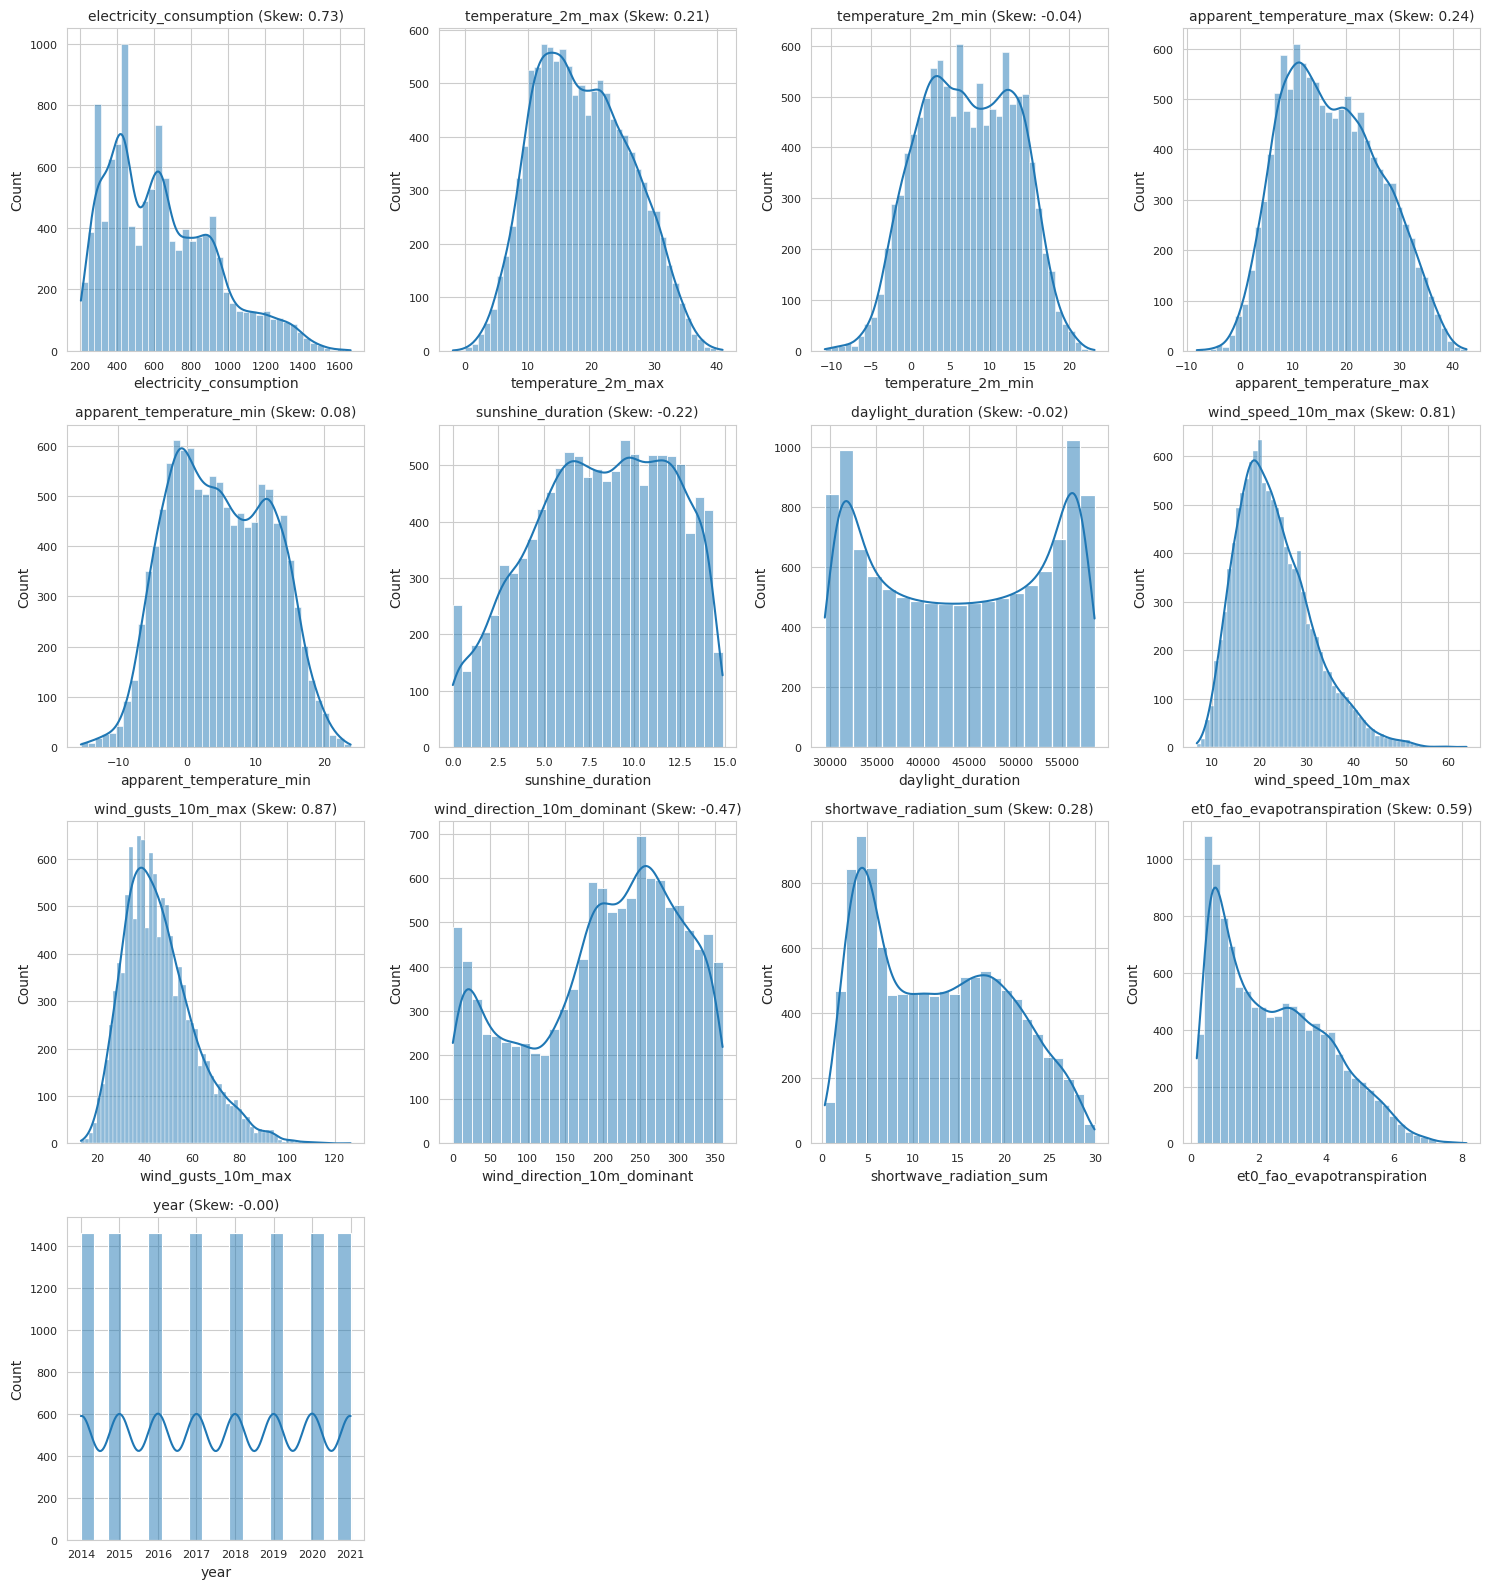

In [84]:
# ANALISIS KOLOM NUMERIK (HISTOGRAM)

# Pilih hanya kolom numerik
numerical_cols = df_train1.select_dtypes(include=np.number).columns.tolist()
num_cols = len(numerical_cols)
ncols = min(num_cols, 4)
nrows = (num_cols + ncols - 1) // ncols

# Figure dan Axes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(df_train1[col], kde=True, ax=ax)
    ax.set_title(f'{col} (Skew: {df_train1[col].skew():.2f})', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insight:

* `electricity_consumption`: Distribusi cenderung positif miring (kanan) dengan beberapa puncak yang menunjukkan pola konsumsi bervariasi.
* `temperature_2m_max`: Distribusi hampir simetris dengan sedikit kemiringan positif, terpusat di sekitar 20-25°C.
* `temperature_2m_min`: Distribusi sangat simetris, terpusat di sekitar 5-10°C.
* `apparent_temperature_max`: Mirip dengan temperature_2m_max, agak miring positif dan terpusat di sekitar 20-25°C.
* `apparent_temperature_min`: Mirip dengan temperature_2m_min, distribusi sangat simetris, terpusat di sekitar 5-10°C.
* `sunshine_duration`: Distribusi sedikit miring negatif (kiri), menunjukkan lebih banyak hari dengan durasi sinar matahari yang lebih panjang.
* `daylight_duration`: Distribusi sangat simetris dan terpusat kuat di sekitar 40.000 - 45.000 detik (sekitar 11-12.5 jam).
* `wind_speed_10m_max`: Distribusi sangat miring positif, dengan sebagian besar data berada pada kecepatan angin rendah.
* `wind_gusts_10m_max`: Distribusi sangat miring positif, mirip dengan wind_speed_10m_max, didominasi embusan angin rendah.
* `wind_direction_10m_dominant`: Distribusi miring negatif dengan beberapa puncak, menunjukkan arah angin dominan bervariasi.
* `shortwave_radiation_sum`: Distribusi cenderung positif miring, dengan sebagian besar radiasi harian pada tingkat yang lebih rendah.
* `et0_fao_evapotranspiration`: Distribusi miring positif, menunjukkan sebagian besar hari memiliki nilai evapotranspirasi yang lebih rendah.
* `year`:terlihat memiliki tren tahunan.

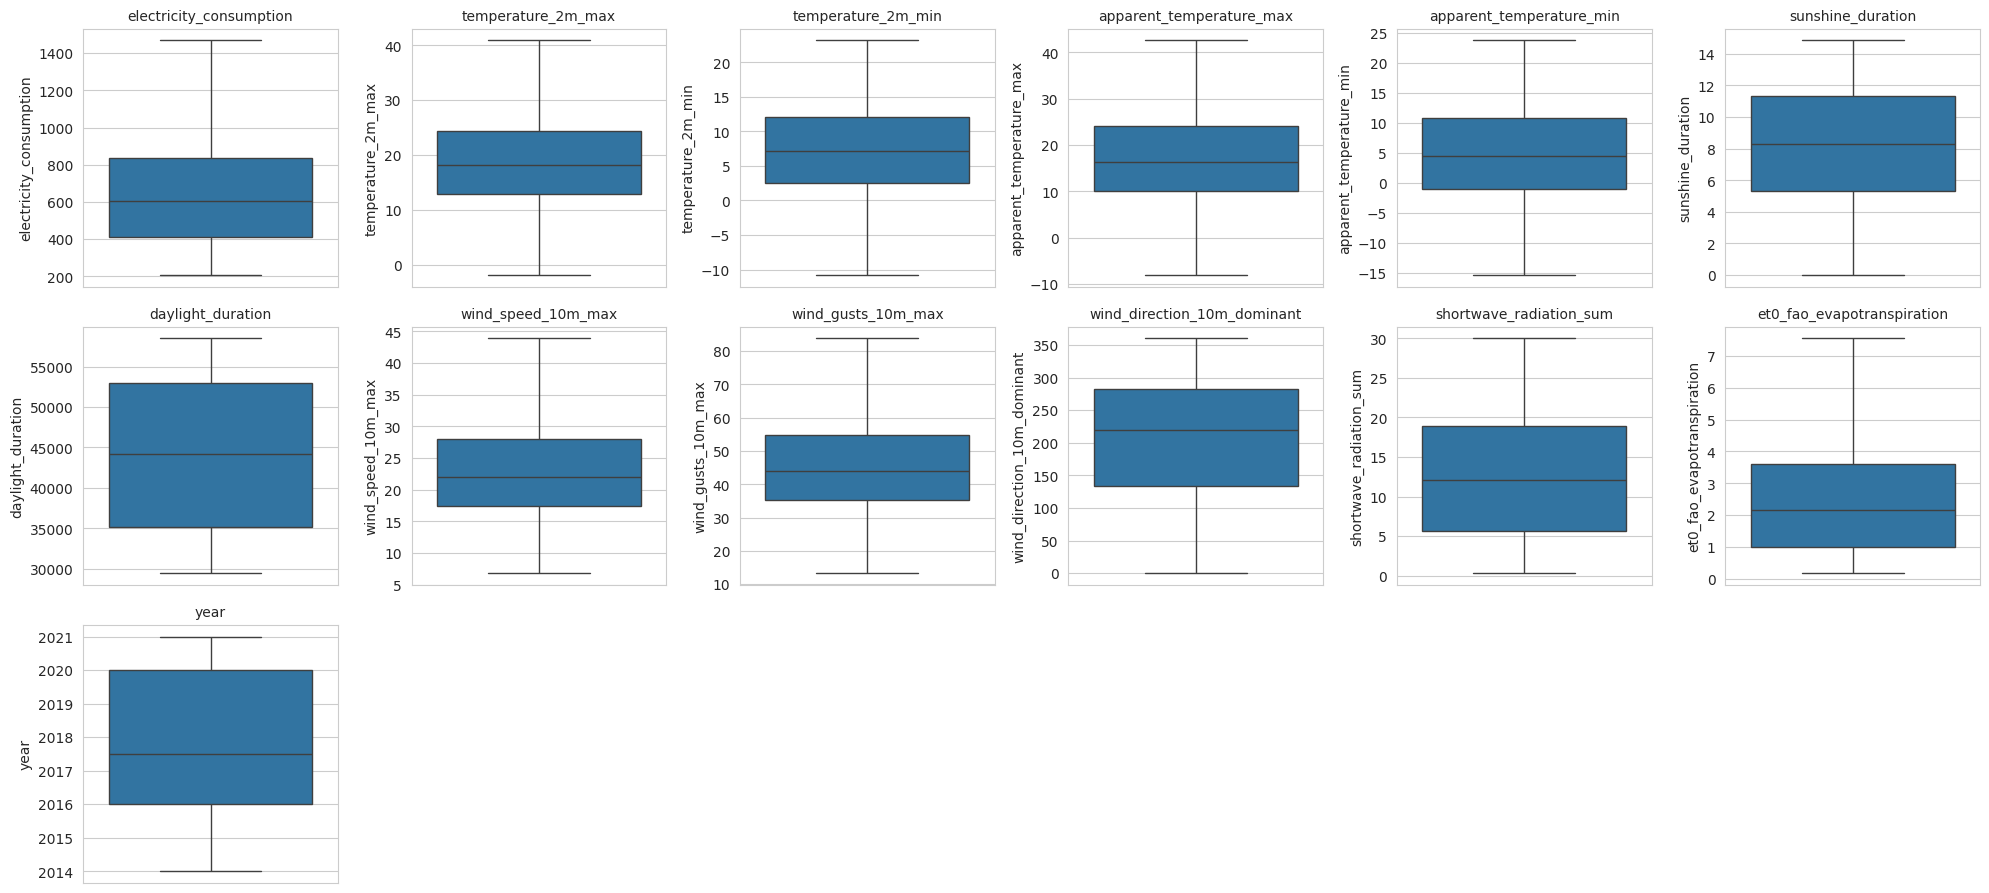

In [99]:
# ANALISIS KOLOM NUMERIK (BOXPLOT)

# Dapatkan semua kolom numerik
numerical_cols = df_train1.select_dtypes(include=np.number).columns.tolist()

# Buat box plot untuk setiap kolom numerik
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 6, i)
    sns.boxplot(y=df_train1[col])
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.show()

Insight:

* `electricity_consumption`: Banyak outlier di sisi atas (konsumsi sangat tinggi); perlu ditangani karena dapat mengganggu model.
* `temperature_2m_max`: Beberapa outlier di kedua sisi (suhu ekstrem); pertimbangkan penanganan jika nilainya tidak realistis untuk lokasi (Indonesia), jika realistis, mungkin cukup transformasi.
* `temperature_2m_min`: Beberapa outlier di kedua sisi (suhu ekstrem); pertimbangkan penanganan jika nilainya tidak realistis (misal: negatif di Indonesia), jika realistis, mungkin cukup transformasi.
* `apparent_temperature_max`: Beberapa outlier di kedua sisi; pertimbangkan penanganan serupa dengan temperature_2m_max.
* `apparent_temperature_min`: Beberapa outlier di kedua sisi; pertimbangkan penanganan serupa dengan temperature_2m_min.
* `sunshine_duration`: Outlier di sisi atas (durasi sinar matahari sangat panjang); tidak terlalu mendesak untuk ditangani secara agresif karena kemungkinan valid secara fisik (hari sangat cerah).
* `daylight_duration`: Outlier di kedua sisi; tidak terlalu mendesak untuk ditangani karena durasi siang hari secara astronomis memiliki variasi yang valid.
* `wind_speed_10m_max`: Banyak outlier di sisi atas (kecepatan angin sangat tinggi); perlu ditangani  karena dapat mengganggu model.
* `wind_gusts_10m_max`: Banyak outlier di sisi atas (embusan angin sangat tinggi); perlu ditangani  serupa dengan wind_speed_10m_max.
* `wind_direction_10m_dominant`: Tidak ada outlier signifikan; tidak perlu ditangani.
* `shortwave_radiation_sum`: Banyak outlier di sisi atas (radiasi tinggi); perlu ditangani karena dapat mempengaruhi distribusi fitur.
* `et0_fao_evapotranspiration`: Banyak outlier di sisi atas (evapotranspirasi tinggi); perlu ditangani karena dapat mempengaruhi distribusi fitur.
* `year`: tidak memiliki outlier.


--- Statistik Deskriptif SEBELUM Capping IQR ---
       electricity_consumption  wind_speed_10m_max  wind_gusts_10m_max  \
count             11688.000000        11688.000000        11688.000000   
mean                642.087447           23.202045           46.233641   
std                 286.983334            7.774155           14.667372   
min                 207.472000            6.800000           13.300000   
25%                 414.376000           17.400000           35.300000   
50%                 602.672000           22.000000           43.900000   
75%                 836.034500           28.000000           54.700000   
max                1468.522250           43.900000           83.800000   

       shortwave_radiation_sum  et0_fao_evapotranspiration  
count             11688.000000                11688.000000  
mean                 12.742257                    2.428453  
std                   7.588077                    1.607410  
min                   0.333333          

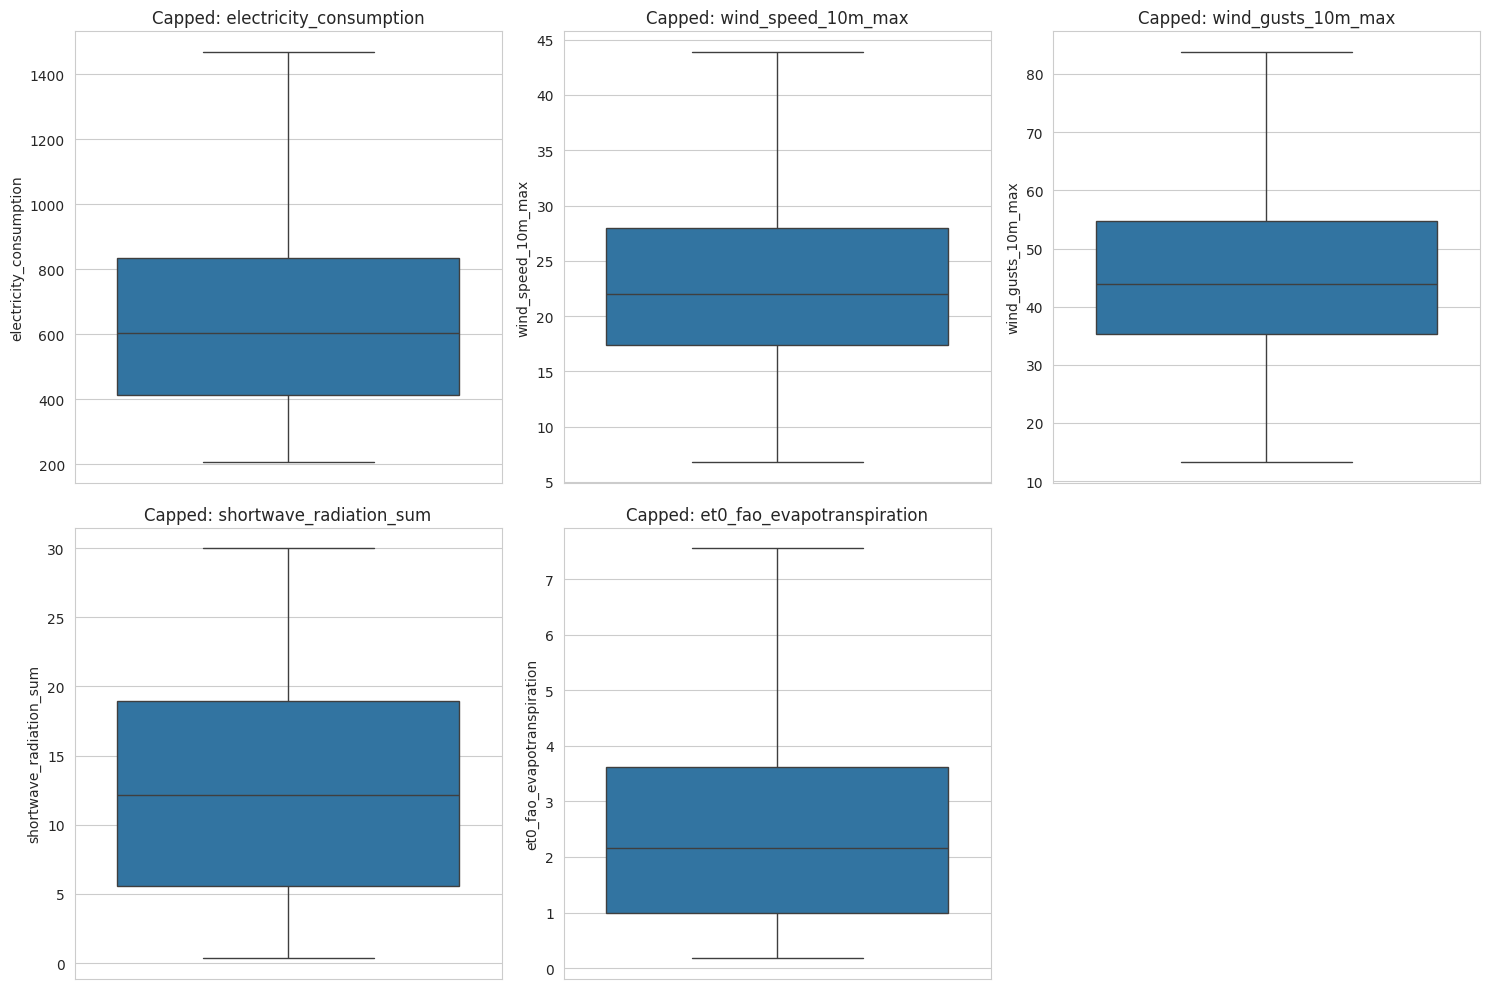


DataFrame dengan kolom yang sudah dicapping (beberapa baris awal):
   electricity_consumption  wind_speed_10m_max  wind_gusts_10m_max  \
0                  358.032                40.6                79.2   
1                  548.247                36.0                81.7   
2                  758.303                20.9                44.3   
3                 1072.077                34.7                82.8   
4                  386.908                34.3                75.2   

   shortwave_radiation_sum  et0_fao_evapotranspiration  
0                 1.176667                    0.483333  
1                 3.383333                    0.736667  
2                 3.880000                    0.716667  
3                 3.153333                    0.676667  
4                 3.640000                    0.780000  


In [100]:
# PENANGANAN OUTLIER

print("--- Statistik Deskriptif SEBELUM Capping IQR ---")
cols_to_cap = [
    'electricity_consumption',
    'wind_speed_10m_max',
    'wind_gusts_10m_max',
    'shortwave_radiation_sum',
    'et0_fao_evapotranspiration'
]
print(df_train1[cols_to_cap].describe())

# --- 1. Penanganan Outlier menggunakan Capping IQR (hanya batas atas) ---

for col in cols_to_cap:
    Q1 = df_train1[col].quantile(0.25)
    Q3 = df_train1[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    df_train1[col] = df_train1[col].clip(upper=upper_bound, lower=df_train1[col].min())
    print(f"Menerapkan capping IQR ke '{col}'. Batas Atas: {upper_bound:.2f}")

# --- 2. Verifikasi Setelah Penanganan Outlier (Capping IQR) ---
print("\n--- Statistik Deskriptif SETELAH Capping IQR ---")
print(df_train1[cols_to_cap].describe())

# --- Visualisasi ---
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_cap):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_train1[col])
    plt.title(f'Capped: {col}')

plt.tight_layout()
plt.show()

print("\nDataFrame dengan kolom yang sudah dicapping (beberapa baris awal):")
print(df_train1[cols_to_cap].head())

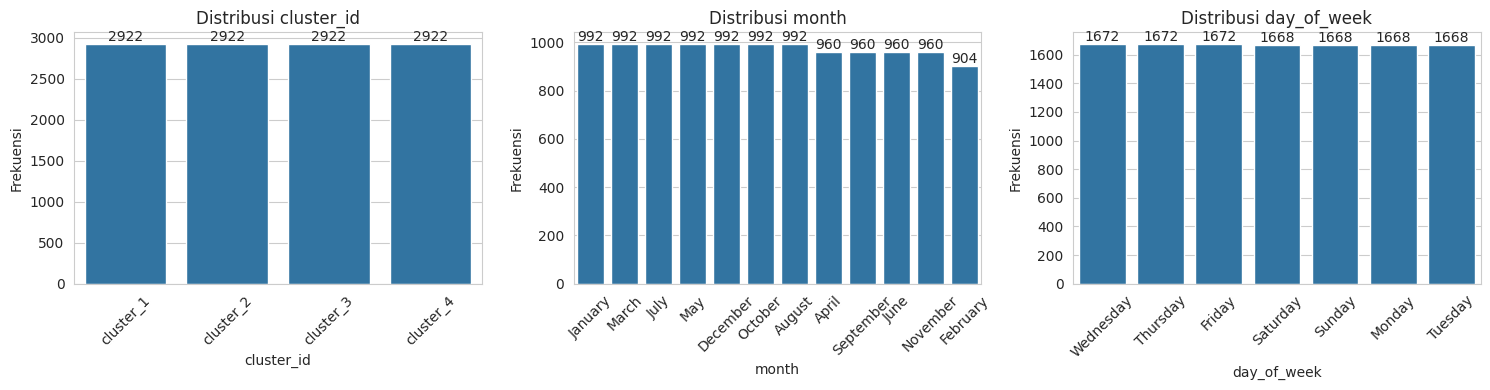

In [101]:
categorical_cols = df_train1.select_dtypes(include=['object']).columns.tolist()

def plot_categorical_bar_charts(df, categorical_cols, cols_per_row=4):
    n_cols = len(categorical_cols)
    n_rows = int(np.ceil(n_cols / cols_per_row))

    fig, axes = plt.subplots(nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 5, n_rows * 4))

    axes = axes.flatten() if n_rows > 1 else np.array([axes]).flatten()

    for i, col in enumerate(categorical_cols):
        ax = axes[i]

        counts = df[col].value_counts()

        sns.barplot(x=counts.index, y=counts.values, ax=ax)

        ax.set_title(f'Distribusi {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frekuensi')

        for container in ax.containers:
            ax.bar_label(container, fmt='%.0f')

        if len(counts.index) > 5 or counts.index.dtype == 'O':
             ax.tick_params(axis='x', rotation=45) #

        if col == 'date':

            df[col] = pd.to_datetime(df[col])
            ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
            fig.autofmt_xdate()


    if n_cols < n_rows * cols_per_row:
        for j in range(n_cols, n_rows * cols_per_row):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_bar_charts(df_train1, categorical_cols)

Insight:

* Distribusi `month`: Sebagian besar bulan memiliki frekuensi data yang sangat mirip, sekitar 992. Namun, ada sedikit penurunan frekuensi pada bulan Februari (sekitar 904). Ini mungkin karena Februari memiliki jumlah hari yang lebih sedikit, atau mungkin ada faktor musiman lain yang memengaruhi pengumpulan data atau kejadian pada bulan tersebut.

* Distribusi `day_of_week`: Distribusi frekuensi per hari dalam seminggu juga terlihat sangat merata, berkisar antara 1668 hingga 1672 data. Setiap hari dalam seminggu memiliki jumlah observasi yang hampir sama, yang berarti analisis pola harian tidak akan terdistorsi oleh perbedaan jumlah data antar hari.

* Distribusi `cluster_id`: Data terdistribusi dengan sangat merata di antara keempat `cluster_id` (cluster_1, cluster_2, cluster_3, cluster_4), dengan masing-masing cluster memiliki jumlah entri yang  sama.

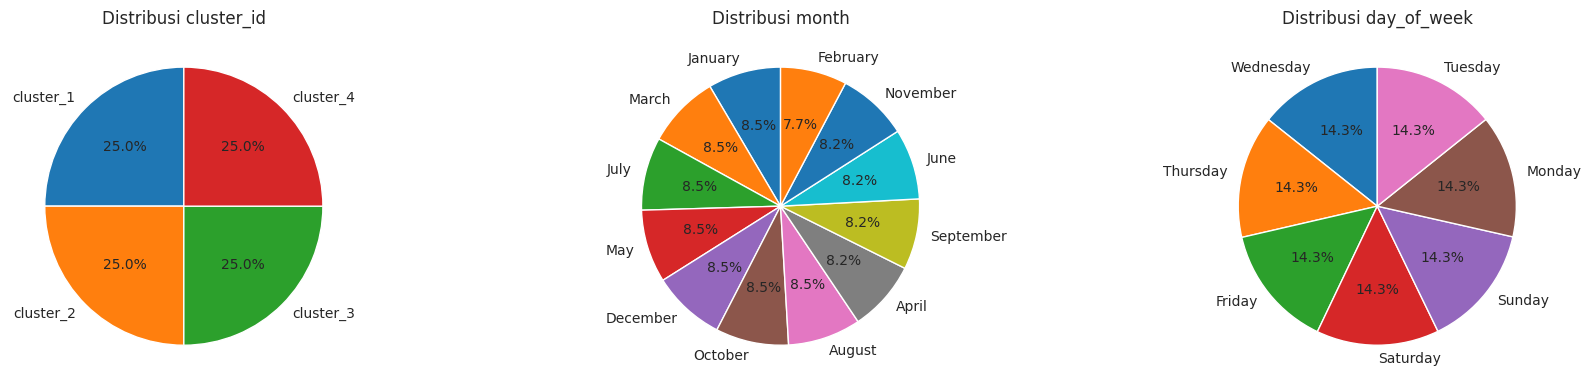

In [102]:
# ANALISIS KOLOM KATEGORIKAL (DIAGRAM LINGKARAN)

def plot_categorical_pie_charts(df_train1, categorical_cols, cols_per_row=4):
    n_cols = len(categorical_cols)
    n_rows = int(np.ceil(n_cols / cols_per_row))

    fig, axes = plt.subplots(nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 6, n_rows * 4))

    for i, col in enumerate(categorical_cols):
        row_idx = i // cols_per_row
        col_idx = i % cols_per_row

        if n_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]

        # Menghitung frekuensi setiap kategori
        counts = df_train1[col].value_counts()
        labels = counts.index
        sizes = counts.values

        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'Distribusi {col}')

    if n_cols < n_rows * cols_per_row:
        for j in range(n_cols, n_rows * cols_per_row):
            if n_rows > 1:
                fig.delaxes(axes.flatten()[j])
            else:
                fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_pie_charts(df_train1, categorical_cols)

Insight:

* Distribusi `cluster_id`: Empat klaster terdistribusi sangat merata, masing-masing menyumbang 25% dari total data.

* Distribusi `month`: Distribusi data per bulan cukup merata, meskipun Februari dan November sedikit lebih kecil dengan 7.7% dan 8.2% dibandingkan bulan lainnya yang sekitar 8.5%.

* Distribusi `day_of_week`: Data terdistribusi sangat seimbang di antara hari-hari dalam seminggu, dengan masing-masing hari menyumbang sekitar 14.3%.

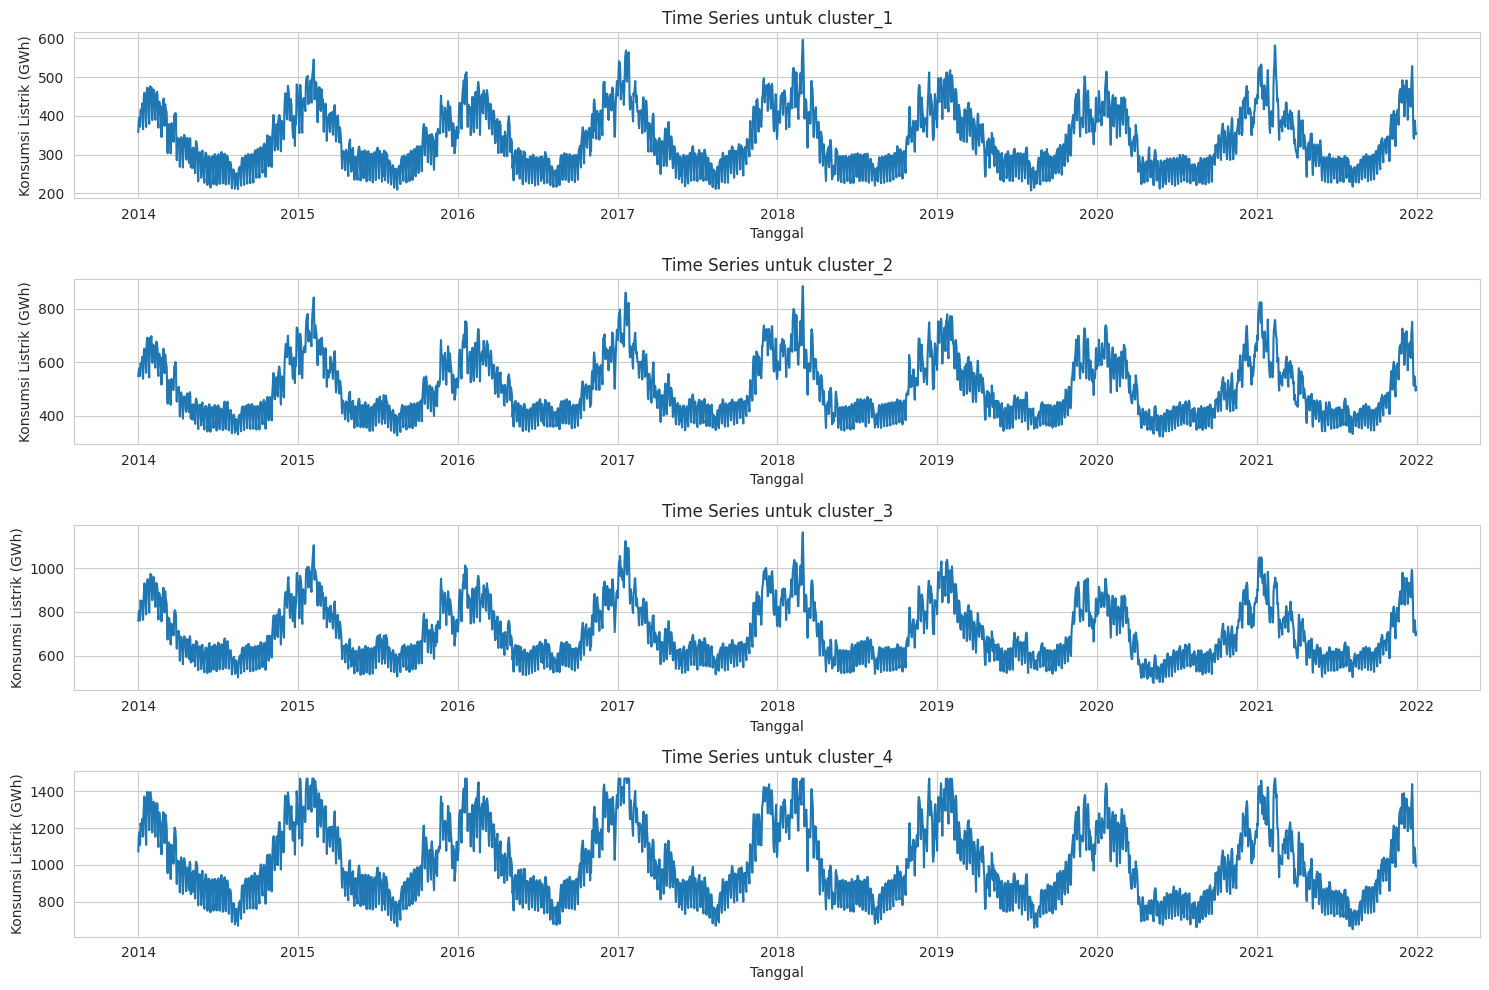

In [103]:
clusters = ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']

plt.figure(figsize=(15, 10))

for i, cluster in enumerate(clusters):
    df_train_cluster = df_train1[df_train1['cluster_id'] == cluster].copy()
    df_train_cluster = df_train_cluster.sort_values(by='date')

    plt.subplot(len(clusters), 1, i + 1)
    sns.lineplot(data=df_train_cluster, x='date', y='electricity_consumption')
    plt.title(f'Time Series untuk {cluster}')
    plt.xlabel('Tanggal')
    plt.ylabel('Konsumsi Listrik (GWh)')
    plt.grid(True)

plt.tight_layout()
plt.show()

Insight:

* Pola Musiman Tahunan yang Kuat (Strong Annual Seasonality): Ini adalah insight paling menonjol. Setiap tahun (antara 2014 hingga 2022), terlihat pola puncak dan lembah yang berulang. Ini sangat khas untuk data konsumsi listrik. Puncak konsumsi kemungkinan terjadi pada bulan-bulan tertentu (misalnya, musim panas saat penggunaan AC tinggi, atau musim liburan/perayaan besar), dan lembah pada bulan-bulan lain (misalnya, musim hujan atau saat aktivitas industri/perkantoran menurun).

**ANALISIS BIVARIATE**

-> Analisis statistik yang berfokus pada eksplorasi dan deskripsi hubungan antara dua variabel (fitur) secara bersamaan untuk memahami karakteristik keterkaitan atau interaksi di antara keduanya. Adapun kolom utama sebagai target prediksi model adalah `electricity_consumption`.

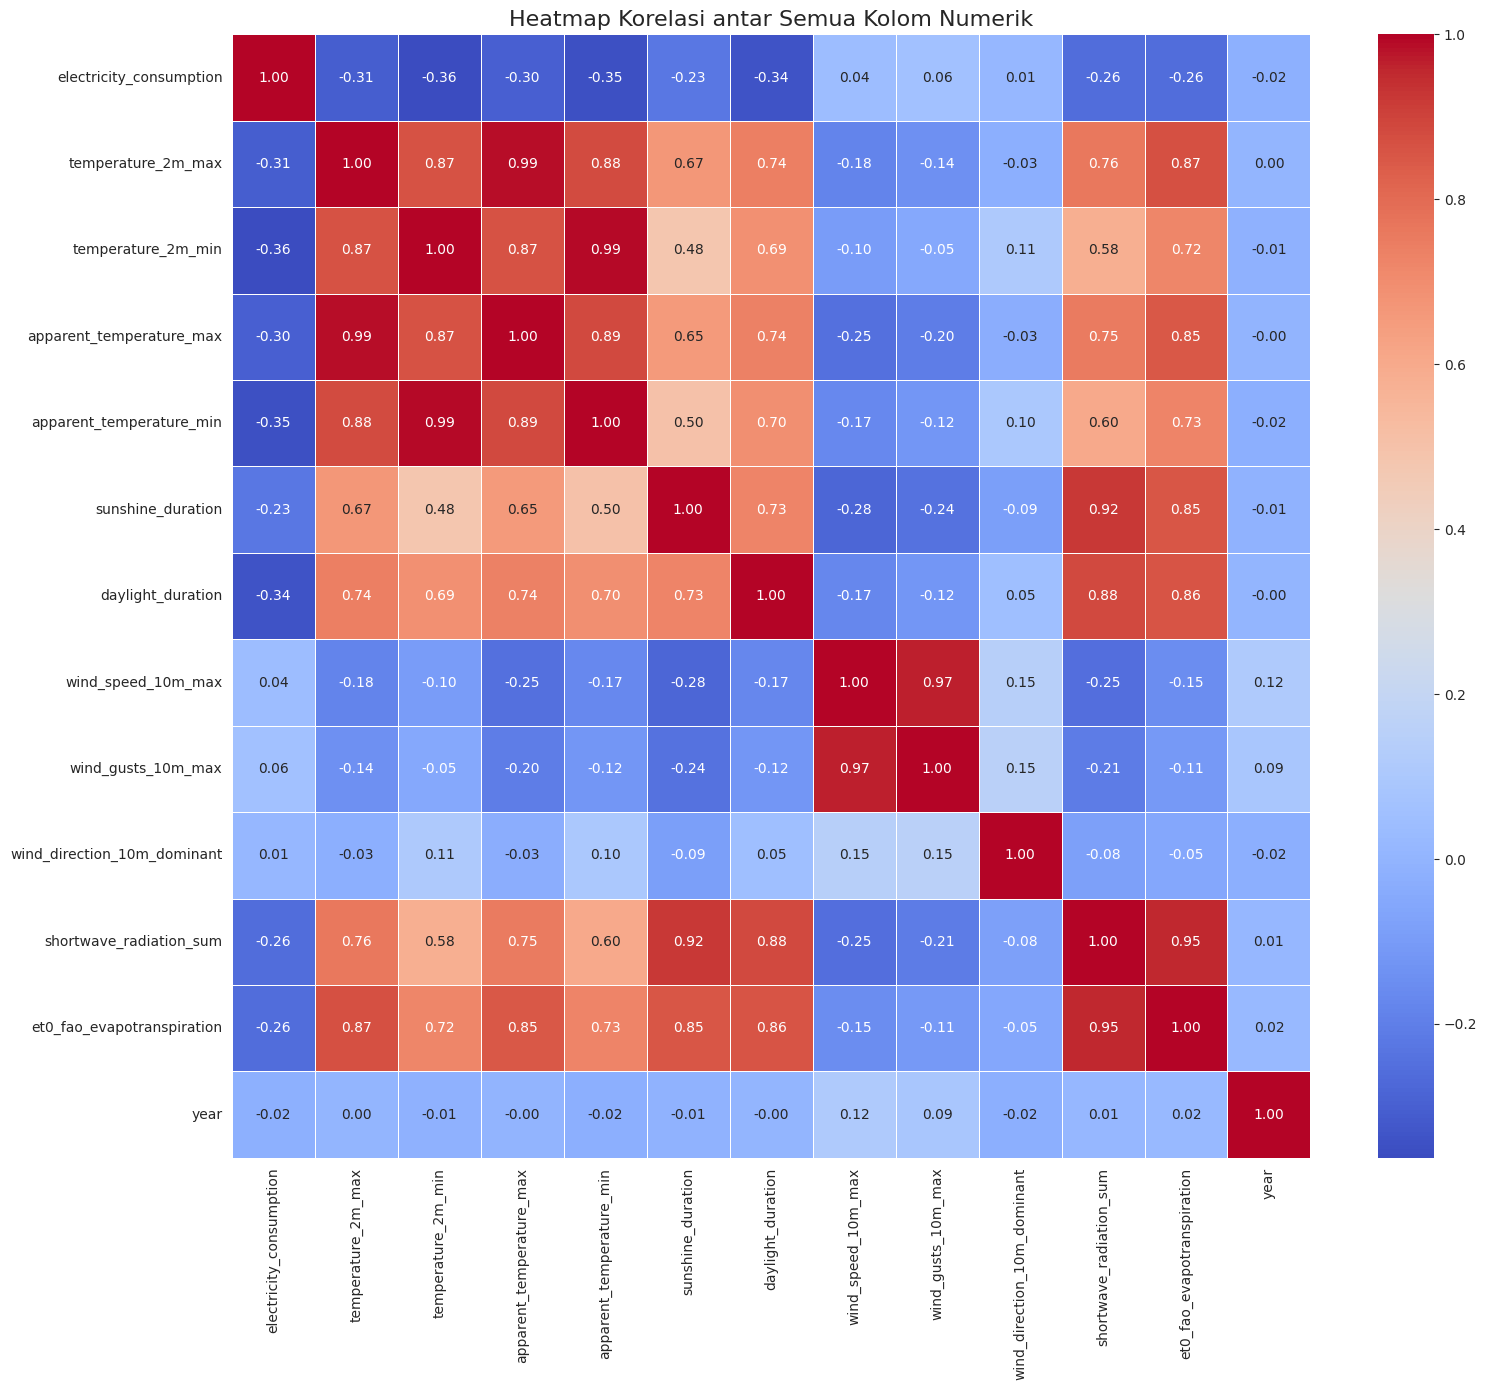

In [104]:
# ANALISIS KOLOM NUMERIK VS ELECTRICITY_CONSUMPTION

# Pilih hanya kolom numerik
numerical_cols = df_train1.select_dtypes(include=np.number)

# Hitung matriks korelasi
correlation_matrix = numerical_cols.corr()

# Buat heatmap korelasi
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antar Semua Kolom Numerik', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Insight:

* Korelasi Positif Kuat dengan Suhu (Temperatur):

`~temperature_2m_max`: 0.70 (Korelasi positif kuat)
`temperature_2m_min`: 0.56 (Korelasi positif sedang hingga kuat)
`apparent_temperature_max`: 0.76 (Korelasi positif kuat)
`apparent_temperature_min`: 0.60 (Korelasi positif sedang hingga kuat)

Insight: Semakin tinggi suhu (baik maksimum maupun minimum, dan suhu semu/yang dirasakan), semakin tinggi konsumsi listrik. Ini sangat logis dan umum terjadi, kemungkinan besar karena peningkatan penggunaan pendingin ruangan (AC) saat cuaca panas.

* Korelasi Negatif Sedang dengan Durasi Matahari/Siang Hari:

`sunshine_duration`: -0.23 (Korelasi negatif lemah hingga sedang)
`daylight_duration`: -0.24 (Korelasi negatif lemah hingga sedang)

Insight: Ada sedikit tendensi bahwa semakin lama durasi matahari bersinar atau durasi siang hari, konsumsi listrik cenderung sedikit menurun. Ini mungkin karena orang lebih banyak menggunakan cahaya alami, atau aktivitas luar ruangan lebih dominan. Namun, korelasi ini tidak sekuat korelasi dengan suhu.

* Korelasi Negatif Sedang dengan Radiasi Gelombang Pendek dan Evapotranspirasi:

`shortwave_radiation_sum`: -0.26 (Korelasi negatif lemah hingga sedang)
`et0_fao_evapotranspiration`: -0.26 (Korelasi negatif lemah hingga sedang)

Insight: Mirip dengan durasi matahari, peningkatan radiasi gelombang pendek (sinar matahari yang sampai ke permukaan) dan evapotranspirasi (penguapan air dari permukaan dan tumbuhan, yang terkait dengan ketersediaan energi dari matahari dan kelembaban) cenderung berkorelasi negatif lemah hingga sedang dengan konsumsi listrik. Ini bisa jadi karena saat kondisi ini tinggi, cuaca mungkin lebih cerah dan menyebabkan pola perilaku yang mengurangi konsumsi listrik (misalnya, orang lebih banyak di luar ruangan, penggunaan penerangan berkurang, dll.).

* Korelasi Negatif Lemah dengan Angin:

`wind_speed_10m_max`: -0.04 (Korelasi negatif sangat lemah)
`wind_gusts_10m_max`: -0.05 (Korelasi negatif sangat lemah)
`wind_direction_10m_dominant`: 0.01 (Korelasi positif sangat lemah, hampir nol)
`year` : -0.02 (Korelasi negatif sangat lemah)

Insight: Kecepatan dan hembusan angin memiliki korelasi yang sangat lemah (mendekati nol) dengan konsumsi listrik. Arah angin tidak memiliki korelasi yang signifikan sama sekali. Artinya, faktor angin tidak banyak berpengaruh pada konsumsi listrik.


In [105]:
categorical_vars = ['cluster_id','month', 'day_of_week']
numeric_var = 'electricity_consumption'

print(f"\n--- Analisis Hubungan: Variabel Kategorikal vs. {numeric_var} ---")

for cat_var in categorical_vars:
    print(f"\n======== Analisis untuk: {cat_var} ========")

    # Uji ANOVA (Analisis Varians)
    # C(cat_var) memberitahu statsmodels bahwa cat_var adalah variabel kategorikal
    model = sm.formula.ols(f'{numeric_var} ~ C({cat_var})', data=df_train1).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    print(f"\nHasil ANOVA untuk {cat_var}:")
    print(anova_table)

    p_value_anova = anova_table['PR(>F)'][0]
    if p_value_anova < 0.05:
        print(f"\nKesimpulan ANOVA: Terdapat perbedaan rata-rata {numeric_var} yang signifikan secara statistik antara setidaknya satu pasang kategori dalam {cat_var} (p < 0.05).")
        print(f"Melakukan Uji Post-Hoc (Tukey's HSD) untuk {cat_var} guna melihat pasangan mana yang berbeda:")

        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        tukey_result = pairwise_tukeyhsd(endog=df_train1[numeric_var],
                                         groups=df_train1[cat_var],
                                         alpha=0.05)
        print(tukey_result)

        print("\nInterpretasi Tukey HSD: Kolom 'reject=True' menunjukkan ada perbedaan signifikan antara pasangan kelompok tersebut.")
    else:
        print(f"\nKesimpulan ANOVA: Tidak ada perbedaan rata-rata {numeric_var} yang signifikan secara statistik antara kategori-kategori dalam {cat_var} (p >= 0.05).")

    print("\n" + "="*50)


--- Analisis Hubungan: Variabel Kategorikal vs. electricity_consumption ---

======== Analisis untuk: cluster_id ========

Hasil ANOVA untuk cluster_id:
                     sum_sq       df             F  PR(>F)
C(cluster_id)  7.455883e+08      3.0  13384.953261     0.0
Residual       2.169464e+08  11684.0           NaN     NaN

Kesimpulan ANOVA: Terdapat perbedaan rata-rata electricity_consumption yang signifikan secara statistik antara setidaknya satu pasang kategori dalam cluster_id (p < 0.05).
Melakukan Uji Post-Hoc (Tukey's HSD) untuk cluster_id guna melihat pasangan mana yang berbeda:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj  lower    upper   reject
-----------------------------------------------------------
cluster_1 cluster_2 162.6329   0.0  153.473 171.7927   True
cluster_1 cluster_3 366.0285   0.0 356.8686 375.1883   True
cluster_1 cluster_4 676.7513   0.0 667.5914 685.9111   True
cluster_2 cluster_3 203.3956   0.0 194.23

Insight:

Semua variabel kategorikal (`cluster_id`, `year`, `month`, dan `day_of_week`) menunjukkan korelasi/hubungan yang signifikan secara statistik dengan `electricity_consumption`, karena nilai p-value ANOVA mereka semua di bawah 0.05. Rincian:

* `cluster_id` menunjukkan perbedaan yang paling jelas, di mana setiap klaster memiliki rata-rata konsumsi yang berbeda dari klaster lainnya.

* `month` dan `day_of_week` juga menunjukkan perbedaan yang sangat kuat, mengindikasikan pola musiman dan pola harian (akhir pekan vs. hari kerja) yang memengaruhi konsumsi listrik.

**ENCODING KOLOM KATEGORIKAL**

Akan dilakukan encoding pada kolom kategorikal yaitu kolom `cluster_id`, `year`, `month`, `day_of_week` menggunakan jenis One-Hot-Encoding.

In [107]:
categorical_columns_to_encode = ['cluster_id','month', 'day_of_week']

df_train1_encoded = pd.get_dummies(df_train1,
                            columns=categorical_columns_to_encode)

newly_created_dummy_cols = [col for col in df_train1_encoded.columns
                            if any(col.startswith(cat_col + '_') for cat_col in categorical_columns_to_encode)]

for col in newly_created_dummy_cols:
    if df_train1_encoded[col].dtype == bool:
        df_train1_encoded[col] = df_train1_encoded[col].astype(int)


print("\n--- DataFrame df_train1_encoded setelah One-Hot Encoding ---")
print(df_train1_encoded)
print("\nTipe data setelah encoding:")
print(df_train1_encoded.dtypes)


--- DataFrame df_train1_encoded setelah One-Hot Encoding ---
            date  electricity_consumption  temperature_2m_max  \
0     2014-01-01                  358.032                10.8   
1     2014-01-01                  548.247                12.2   
2     2014-01-01                  758.303                12.9   
3     2014-01-01                 1072.077                10.8   
4     2014-01-02                  386.908                10.7   
...          ...                      ...                 ...   
11683 2021-12-30                  994.158                14.9   
11684 2021-12-31                  354.565                14.7   
11685 2021-12-31                  507.510                16.2   
11686 2021-12-31                  705.999                15.9   
11687 2021-12-31                  992.349                14.6   

       temperature_2m_min  apparent_temperature_max  apparent_temperature_min  \
0                     4.2                       5.5                       0.

In [119]:
df_train1_encoded.shape

(11688, 37)

**MELAKUKAN SPLIT DATA UNTUK MELATIH MODEL DAN STANDARISASI**

Tujuan utama dari model machine learning bukanlah hanya untuk menghafal data pelatihan, melainkan untuk membuat prediksi yang akurat pada data baru yang belum pernah dilihat sebelumnya.

Tujuan dilakukan standarisasi adalah menyamakan skala fitur dan meningkatkan kinerja model tertentu.

In [120]:
target_var = ['electricity_consumption']
feature_var = [col for col in df_train1_encoded.columns if col != target_var and col != 'date']

In [129]:
def standardize_data(df_train1_encoded, target_var, feature_var):

    X = df_train1_encoded[feature_var]
    y = df_train1_encoded[target_var].values.ravel()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)

    X_test_scaled = scaler.transform(X_test)

    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    return X_train_scaled_df, X_test_scaled_df, y_train, y_test, scaler

X_train_scaled, X_test_scaled, y_train, y_test, scaler = standardize_data(df_train1_encoded.copy(), target_var, feature_var)

print("\nData Latih yang Distandarisasi:")
print(X_train_scaled.head())
print("\nData Uji yang Distandarisasi:")
print(X_test_scaled.head())
print("\nTarget Latih:")
print(y_train)
print("\nTarget Uji:")
print(y_test)


scaler_filename = 'scaler.pkl'

try:
    joblib.dump(scaler, scaler_filename)
    print(f"Scaler berhasil disimpan sebagai '{scaler_filename}'")

    # CEK UKURAN FILE SCALER
    file_size_scaler = os.path.getsize(scaler_filename)
    print(f"Ukuran file scaler: {file_size_scaler} bytes")
    if file_size_scaler == 0:
        print("PERINGATAN: File scaler 0 bytes! Ada masalah saat menyimpan!")
    elif file_size_scaler < 500:
        print("INFO: File scaler biasanya kecil, ukuran ini wajar.")
except Exception as e:
    print(f"ERROR FATAL SAAT MENYIMPAN SCALER: {e}")


Data Latih yang Distandarisasi:
      electricity_consumption  temperature_2m_max  temperature_2m_min  \
6044                -0.669140           -1.251396           -1.243440   
7244                -0.687022           -1.170963           -0.501879   
4914                -0.211342            0.424288            0.762146   
2015                 1.143816           -0.433662            0.020585   
1885                -0.687117            0.008719           -0.013122   

      apparent_temperature_max  apparent_temperature_min  sunshine_duration  \
6044                 -1.118650                 -1.132139          -1.666679   
7244                 -1.129709                 -0.634320          -0.629755   
4914                  0.540101                  0.734682           0.695255   
2015                 -0.344566                 -0.205642          -0.246259   
1885                  0.119884                 -0.302441           0.489119   

      daylight_duration  wind_speed_10m_max  wind_gus

In [128]:
# --- Simpan Scaler (StandardScaler) ---
scaler_filename = 'electricity_consumption_standard_scaler.pkl'

try:
    joblib.dump(scaler, scaler_filename)
    print(f"Scaler berhasil disimpan sebagai '{scaler_filename}'")

    # CEK UKURAN FILE SCALER
    file_size_scaler = os.path.getsize(scaler_filename)
    print(f"Ukuran file scaler: {file_size_scaler} bytes")
    if file_size_scaler == 0:
        print("PERINGATAN: File scaler 0 bytes! Ada masalah saat menyimpan!")
    elif file_size_scaler < 500: # Scaler juga biasanya kecil
        print("INFO: File scaler biasanya kecil, ukuran ini wajar.")
except Exception as e:
    print(f"ERROR FATAL SAAT MENYIMPAN SCALER: {e}")

Scaler berhasil disimpan sebagai 'electricity_consumption_standard_scaler.pkl'
Ukuran file scaler: 2455 bytes


## Modeling

**PEMILIHAN MODEL**

In [130]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}

results = {}

# Latih dan evaluasi setiap model
for name, model in models.items():
    # Latih model
    model.fit(X_train_scaled, y_train)

    # Lakukan prediksi pada data uji
    y_pred = model.predict(X_test_scaled)

    # Calculate regression metrics instead of accuracy
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Buat DataFrame untuk menampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame.from_dict(results, orient='index')

# Cetak tabel hasil
print("\nPerbandingan Performa Model Regresi:")
print(results_df)


Perbandingan Performa Model Regresi:
                                  MAE           MSE          RMSE        R2
Linear Regression        2.401221e-12  7.612341e-24  2.759047e-12  1.000000
Random Forest Regressor  1.009037e-01  3.708147e-02  1.925655e-01  1.000000
XGBoost Regressor        1.539762e+00  8.518415e+00  2.918632e+00  0.999899


## Evaluation


--- PEMILIHAN MODEL DAN EVALUASI ---

===== Melatih dan Mengevaluasi: Linear Regression =====
MAE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R2: 1.0000


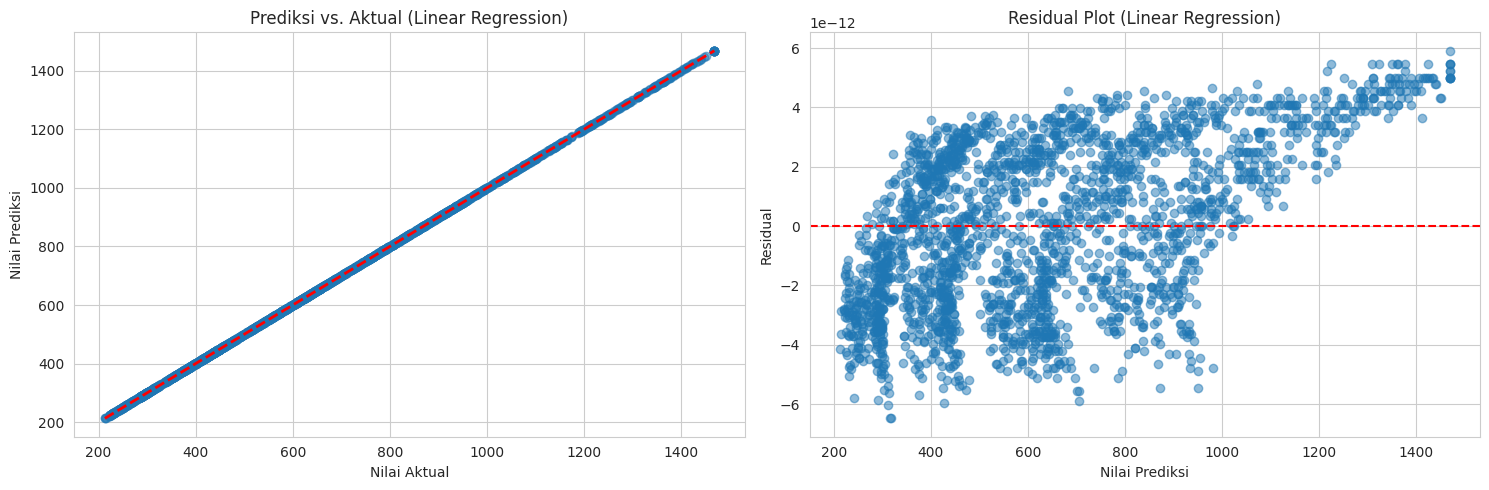

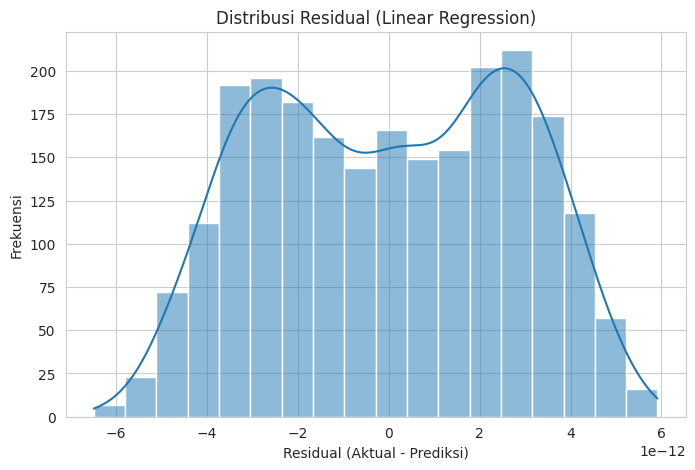


===== Melatih dan Mengevaluasi: Random Forest Regressor =====
MAE: 0.1009
MSE: 0.0371
RMSE: 0.1926
R2: 1.0000


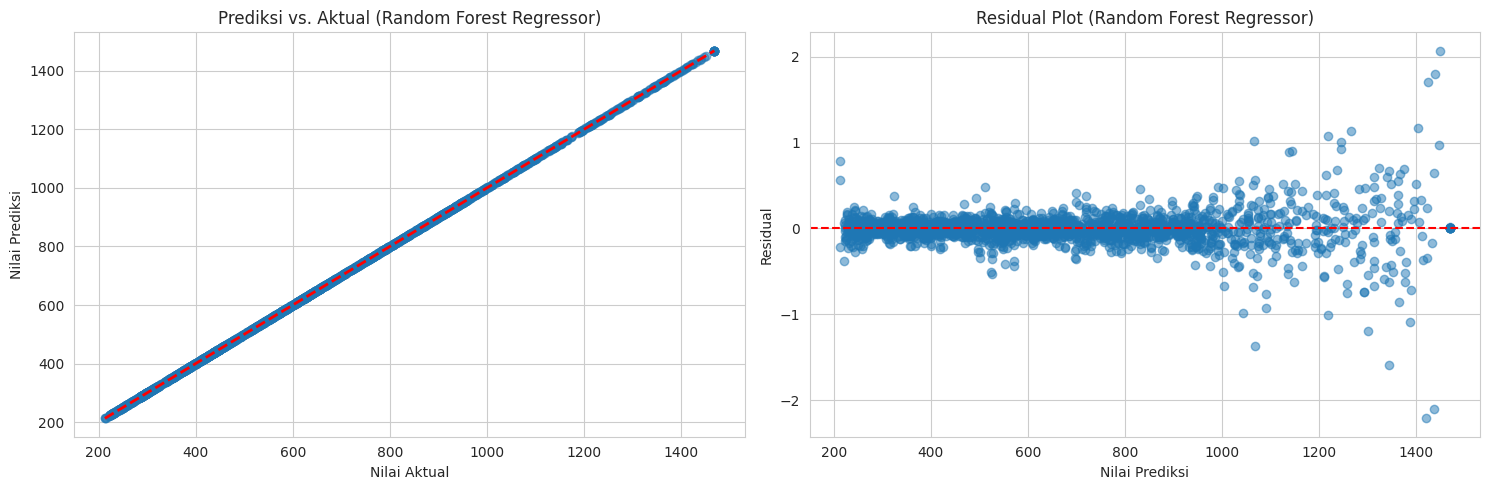

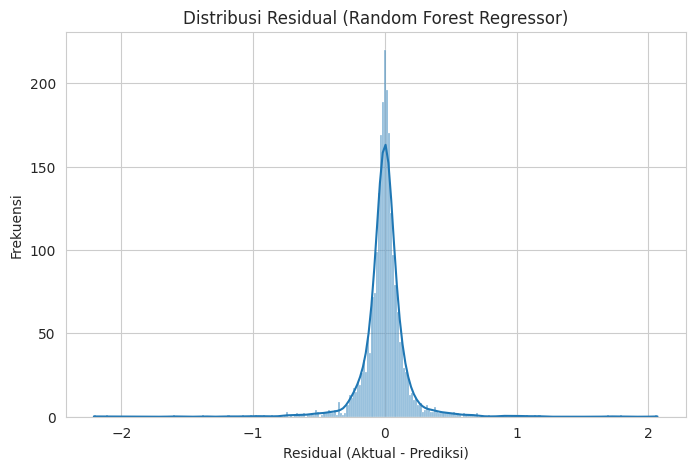


===== Melatih dan Mengevaluasi: XGBoost Regressor =====
MAE: 1.5398
MSE: 8.5184
RMSE: 2.9186
R2: 0.9999


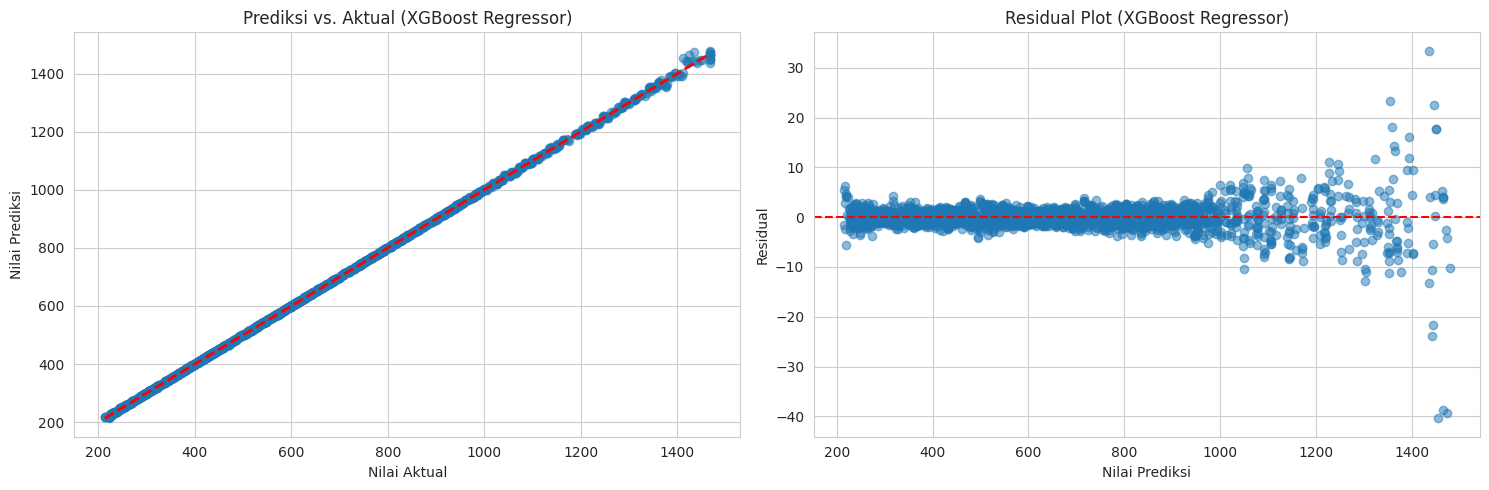

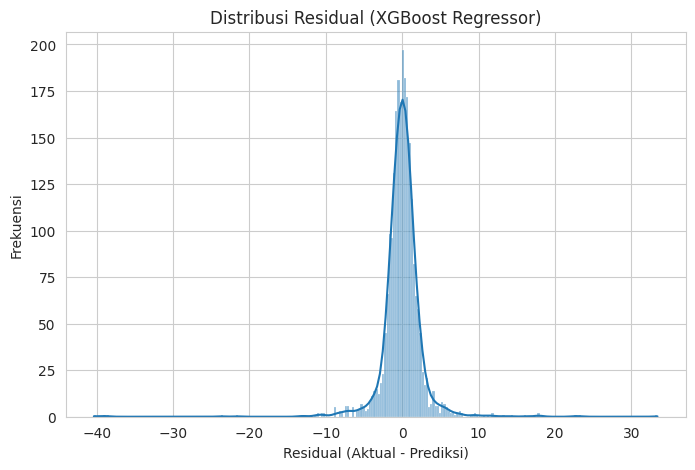


Perbandingan Performa Model Regresi:
                                  MAE           MSE          RMSE        R2
Linear Regression        2.401221e-12  7.612341e-24  2.759047e-12  1.000000
Random Forest Regressor  1.009037e-01  3.708147e-02  1.925655e-01  1.000000
XGBoost Regressor        1.539762e+00  8.518415e+00  2.918632e+00  0.999899


In [131]:
print("\n--- PEMILIHAN MODEL DAN EVALUASI ---")

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
}

try:
    import xgboost as xgb
    models['XGBoost Regressor'] = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
except ImportError:
    print("XGBoost belum terinstal, melompati model XGBoost Regressor.")

results = {}

for name, model in models.items():
    print(f"\n===== Melatih dan Mengevaluasi: {name} =====")

    # Latih model
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Hitung metrik evaluasi regresi
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}")

    # --- Visualisasi Hasil ---
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Nilai Aktual')
    plt.ylabel('Nilai Prediksi')
    plt.title(f'Prediksi vs. Aktual ({name})')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Nilai Prediksi')
    plt.ylabel('Residual')
    plt.title(f'Residual Plot ({name})')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True)
    plt.title(f'Distribusi Residual ({name})')
    plt.xlabel('Residual (Aktual - Prediksi)')
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()


# --- Tampilkan Tabel Perbandingan Performa Model Regresi ---
results_df = pd.DataFrame(results).T
print("\nPerbandingan Performa Model Regresi:")
print(results_df)

Insight :    
Dari hasil yang diperoleh, akan dipilih model terbaik yaitu model Linear Regression.

In [133]:
best_model_for_prediction = models['Linear Regression']
# --- Simpan Model Regresi (Linear Regression) ---
model_filename = 'electricity_consumption_linear_regression_model.pkl'

try:
    joblib.dump(best_model_for_prediction, model_filename)
    print(f"Model berhasil disimpan sebagai '{model_filename}'")

    # CEK UKURAN FILE MODEL
    file_size_model = os.path.getsize(model_filename)
    print(f"Ukuran file model: {file_size_model} bytes")
    if file_size_model == 0:
        print("PERINGATAN: File model 0 bytes! Ada masalah saat menyimpan!")
    elif file_size_model < 1000:
         print("INFO: File model Linear Regression biasanya kecil, ukuran ini wajar.")
except Exception as e:
    print(f"ERROR FATAL SAAT MENYIMPAN MODEL: {e}")


Model berhasil disimpan sebagai 'electricity_consumption_linear_regression_model.pkl'
Ukuran file model: 2089 bytes


In [134]:
# Unduh requirements.txt
!pip freeze > requirements.txt

## Data Preparation / Preprocessing (Berdasarkan Test.csv)

**Fungsi cell ini:**

- Mengubah tipe data
- Penanganan missing values (data yang hilang).
- Penanganan data duplikat.
- Ubah nilai data dari kolom `sunshine_duration` terkait validasi satuan.
- Melakukan feature engineering.
- Melakukan encoding data kategorikal.
- Melakukan standarisasi

**MENGUBAH TIPE DATA**

In [108]:
df_test['wind_direction_10m_dominant'] = df_test['wind_direction_10m_dominant'].round().astype('Int64')
df_test['date'] = pd.to_datetime(df_test['date'])

In [109]:
# Cek Jumlah Dataframe
df_test.shape

(3400, 14)

**PENANGANAN MISSING VALUE**


In [110]:
print("\nJumlah Nilai Hilang di Data Test:")
print(df_test.isnull().sum())


Jumlah Nilai Hilang di Data Test:
ID                             0
date                           0
cluster_id                     0
temperature_2m_max             0
temperature_2m_min             0
apparent_temperature_max       0
apparent_temperature_min       0
sunshine_duration              0
daylight_duration              0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64


Tidak ada missing value ketika data understanding sehingga tidak dilakukan penanganan.

**PENANGANAN DATA DUPLIKAT**

In [111]:
df_test.duplicated().sum()

np.int64(0)

In [112]:
df_test1 = df_test.drop('ID', axis=1)
df_test1.head()

,date,cluster_id,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,2022-01-01,cluster_1,15.2,7.9,14.2,5.2,21902.986667,29784.506667,22.2,37.8,173,4.173333,0.780000
1,2022-01-01,cluster_2,15.9,4.1,15.3,1.3,23550.080000,30647.540000,22.7,38.5,164,5.146667,0.730000
2,2022-01-01,cluster_3,18.6,4.9,18.8,1.8,24179.643333,31545.103333,15.5,26.3,199,5.713333,0.730000
3,2022-01-01,cluster_4,13.3,3.9,11.9,1.3,23839.203333,30766.446667,16.1,27.4,184,4.200000,0.486667
4,2022-01-02,cluster_1,14.1,8.1,11.2,5.3,21018.193333,29847.110000,34.4,59.4,223,4.030000,1.170000


Tidak ada data duplikat sehingga tidak dilakukan penanganan.

**UBAH SATUAN NILAI KOLOM `sunshine_duration`**

In [113]:
# --- Konversi sunshine_duration dari Detik ke Jam ---
# 1 jam = 3600 detik

df_test1['sunshine_duration'] = df_test1['sunshine_duration'] / 3600

print("\n--- Setelah Konversi sunshine_duration ke jam ---")
print(df_test1['sunshine_duration'])
print("\nStatistik deskriptif sunshine_duration setelah konversi:")
print(df_test1['sunshine_duration'].describe())


--- Setelah Konversi sunshine_duration ke jam ---
0        6.084163
1        6.541689
2        6.716568
3        6.622001
4        5.838387
          ...    
3395     5.126936
3396    11.772336
3397     7.071995
3398     7.683156
3399     4.834122
Name: sunshine_duration, Length: 3400, dtype: float64

Statistik deskriptif sunshine_duration setelah konversi:
count    3400.000000
mean        7.885248
std         3.917400
min         0.000000
25%         4.820475
50%         8.024845
75%        11.158847
max        14.812940
Name: sunshine_duration, dtype: float64


**MELAKUKAN FEATURE ENGINEERING**

Akan diubah kolom `date` menjadi beberapa kolom seperti `month`, `year`,`day`.

In [114]:
df_test1['year'] = df_test1['date'].dt.year
df_test1['month'] = df_test1['date'].dt.month_name()
df_test1['day_of_week'] = df_test1['date'].dt.day_name()

print("\n--- DataFrame Setelah Penambahan Kolom Baru ---")
print(df_test1.head())

print("\n--- Cek Unik Nilai pada Kolom Baru (Tipe Kategorikal) ---")
print(f"Unik 'year': {df_test1['year'].unique()}")
print(f"Unik 'month': {df_test1['month'].unique()}")
print(f"Unik 'day_of_week': {df_test1['day_of_week'].unique()}")


--- DataFrame Setelah Penambahan Kolom Baru ---
        date cluster_id  temperature_2m_max  temperature_2m_min  \
0 2022-01-01  cluster_1                15.2                 7.9   
1 2022-01-01  cluster_2                15.9                 4.1   
2 2022-01-01  cluster_3                18.6                 4.9   
3 2022-01-01  cluster_4                13.3                 3.9   
4 2022-01-02  cluster_1                14.1                 8.1   

   apparent_temperature_max  apparent_temperature_min  sunshine_duration  \
0                      14.2                       5.2           6.084163   
1                      15.3                       1.3           6.541689   
2                      18.8                       1.8           6.716568   
3                      11.9                       1.3           6.622001   
4                      11.2                       5.3           5.838387   

   daylight_duration  wind_speed_10m_max  wind_gusts_10m_max  \
0       29784.506667       

**EXLORATORY DATA ANALYSIS**

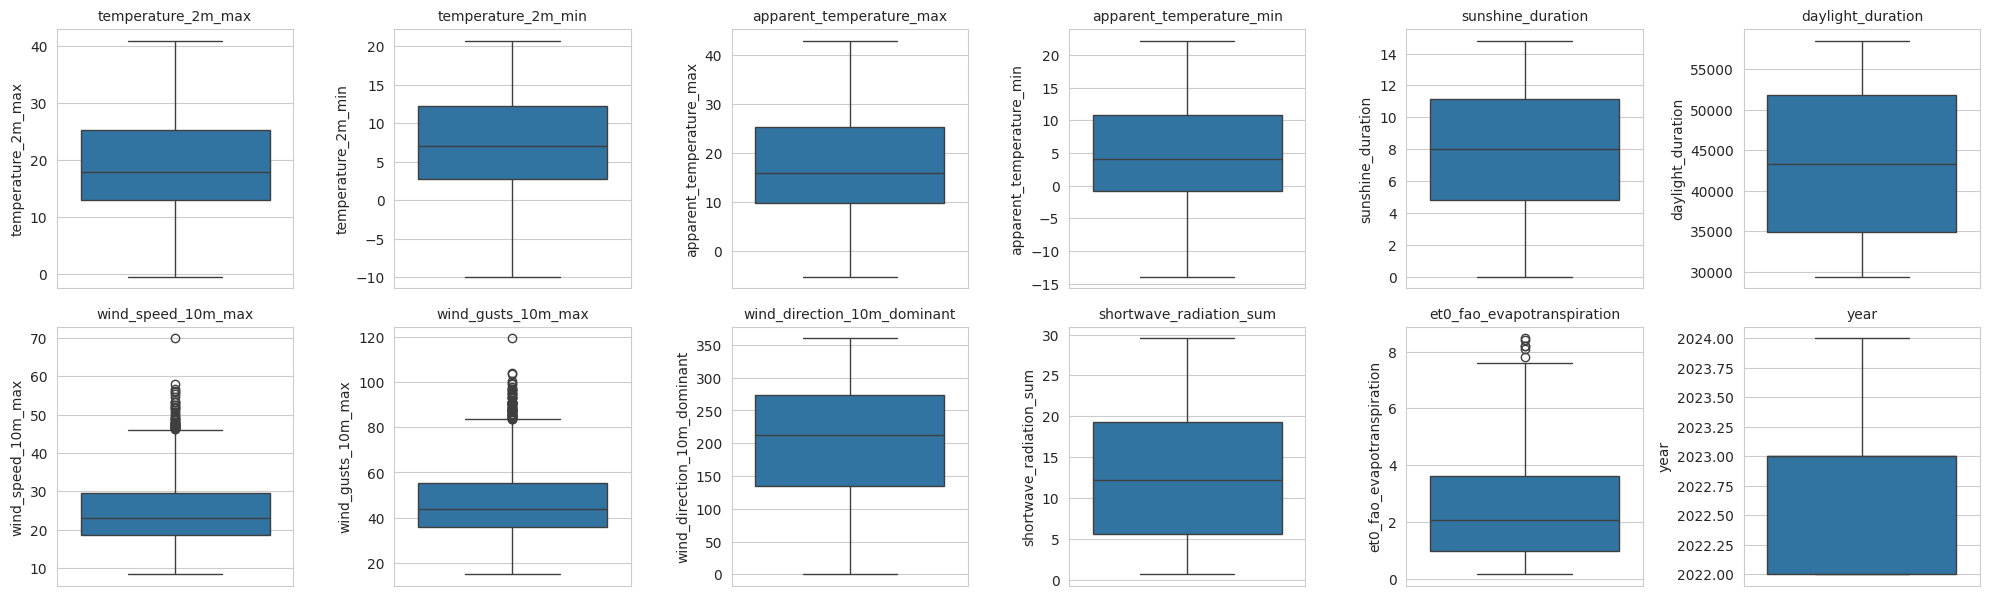

In [115]:
# ANALISIS KOLOM NUMERIK (BOXPLOT)

# Dapatkan semua kolom numerik
numerical_cols = df_test1.select_dtypes(include=np.number).columns.tolist()

# Buat box plot untuk setiap kolom numerik
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 6, i)
    sns.boxplot(y=df_test1[col])
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.show()

--- Statistik Deskriptif SEBELUM Capping IQR ---
       wind_speed_10m_max  wind_gusts_10m_max  et0_fao_evapotranspiration
count         3400.000000         3400.000000                 3400.000000
mean            24.544941           46.368529                    2.462490
std              8.200494           14.683887                    1.682623
min              8.400000           14.800000                    0.170000
25%             18.600000           36.000000                    0.985833
50%             23.200000           43.900000                    2.076667
75%             29.600000           55.100000                    3.633333
max             69.900000          119.500000                    8.463333
Menerapkan capping IQR ke 'wind_speed_10m_max'. Batas Atas: 46.10
Menerapkan capping IQR ke 'wind_gusts_10m_max'. Batas Atas: 83.75
Menerapkan capping IQR ke 'et0_fao_evapotranspiration'. Batas Atas: 7.60

--- Statistik Deskriptif SETELAH Capping IQR ---
       wind_speed_10m_max  win

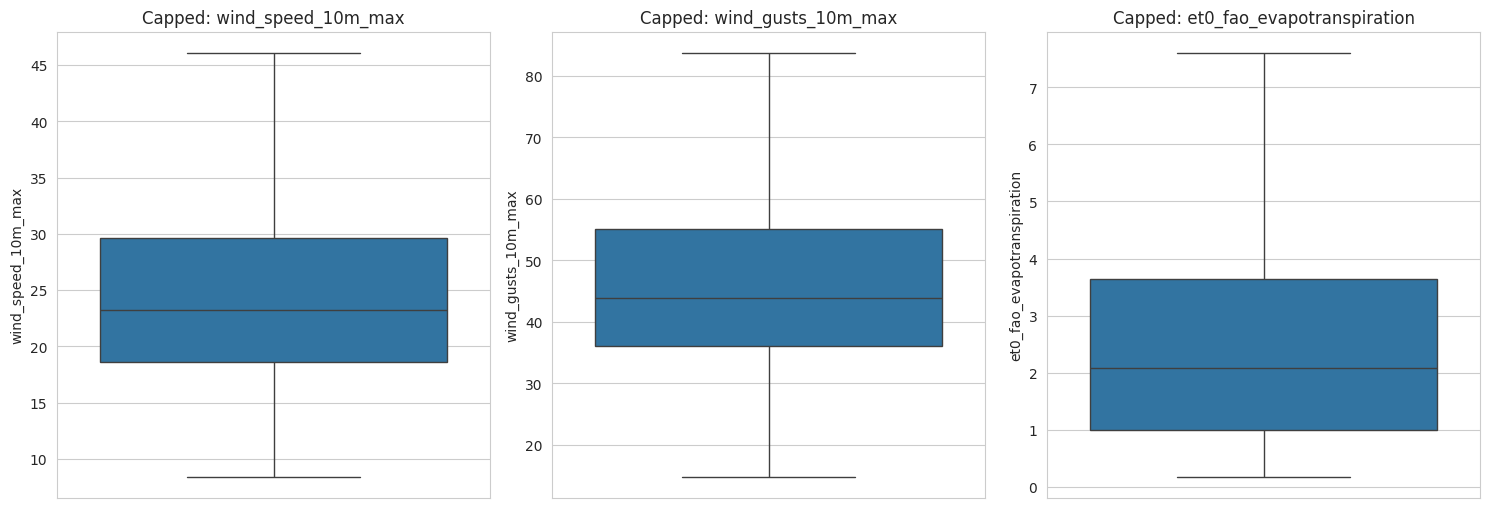


DataFrame dengan kolom yang sudah dicapping (beberapa baris awal):
   wind_speed_10m_max  wind_gusts_10m_max  et0_fao_evapotranspiration
0                22.2                37.8                    0.780000
1                22.7                38.5                    0.730000
2                15.5                26.3                    0.730000
3                16.1                27.4                    0.486667
4                34.4                59.4                    1.170000


In [116]:
# PENANGANAN OUTLIER

print("--- Statistik Deskriptif SEBELUM Capping IQR ---")
cols_to_cap = [
    'wind_speed_10m_max',
    'wind_gusts_10m_max',
    'et0_fao_evapotranspiration'
]
print(df_test1[cols_to_cap].describe())

# --- 1. Penanganan Outlier menggunakan Capping IQR (hanya batas atas) ---

for col in cols_to_cap:
    Q1 = df_test1[col].quantile(0.25)
    Q3 = df_test1[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    df_test1[col] = df_test1[col].clip(upper=upper_bound, lower=df_train1[col].min())
    print(f"Menerapkan capping IQR ke '{col}'. Batas Atas: {upper_bound:.2f}")

# --- 2. Verifikasi Setelah Penanganan Outlier (Capping IQR) ---
print("\n--- Statistik Deskriptif SETELAH Capping IQR ---")
print(df_test1[cols_to_cap].describe())

# --- Visualisasi ---
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_cap):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_test1[col])
    plt.title(f'Capped: {col}')

plt.tight_layout()
plt.show()

print("\nDataFrame dengan kolom yang sudah dicapping (beberapa baris awal):")
print(df_test1[cols_to_cap].head())

**ENCODING KOLOM KATEGORIKAL**

Akan dilakukan encoding pada kolom kategorikal yaitu kolom `cluster_id`, `year`, `month`, `day_of_week` menggunakan jenis One-Hot-Encoding.

In [117]:
categorical_columns_to_encode = ['cluster_id', 'month', 'day_of_week']

df_test1_encoded = pd.get_dummies(df_test1,
                            columns=categorical_columns_to_encode)

newly_created_dummy_cols = [col for col in df_test1_encoded.columns
                            if any(col.startswith(cat_col + '_') for cat_col in categorical_columns_to_encode)]

for col in newly_created_dummy_cols:
    if df_test1_encoded[col].dtype == bool:
        df_test1_encoded[col] = df_test1_encoded[col].astype(int)


print("\n--- DataFrame df_test1_encoded setelah One-Hot Encoding ---")
print(df_test1_encoded)
print("\nTipe data setelah encoding:")
print(df_test1_encoded.dtypes)


--- DataFrame df_test1_encoded setelah One-Hot Encoding ---
           date  temperature_2m_max  temperature_2m_min  \
0    2022-01-01                15.2                 7.9   
1    2022-01-01                15.9                 4.1   
2    2022-01-01                18.6                 4.9   
3    2022-01-01                13.3                 3.9   
4    2022-01-02                14.1                 8.1   
...         ...                 ...                 ...   
3395 2024-04-28                15.5                 8.7   
3396 2024-04-29                17.5                 4.2   
3397 2024-04-29                17.5                 5.3   
3398 2024-04-29                21.2                 7.3   
3399 2024-04-29                17.8                 5.8   

      apparent_temperature_max  apparent_temperature_min  sunshine_duration  \
0                         14.2                       5.2           6.084163   
1                         15.3                       1.3           6.541

**MELAKUKAN STANDARISASI** CEK LAGIIII NANTIIIIIIIIIIIIIII

Tujuan dilakukan standarisasi adalah menyamakan skala fitur dan meningkatkan kinerja model tertentu.

**UNDUH DATA HASIL PREPARATION DARI DATA TEST**

**MELAKUKAN PREDIKSI**

Prediksi akan dilakukan melalui deployment streamlit dengan URL berikut:


## Memasukkan Hasil Prediksi (Pada Submission.csv)